### 선형회귀모델
- 입력특성에 대한 선형함수를 만들어 예측을 수행하는 모델
- 단순선형회귀 모델 : y = wx + b
- 다중선형회귀 모델 : y = w1*x1 + w2*x2 + ... + wp*xp + b

# 샘플 데이터 생성

In [1]:
import pandas as pd

In [2]:
sample_data = pd.DataFrame([[9,90],[6,60],[4,40],[2,20]],
                          columns = ['공부시간','성적'],
                          index = ['병관','영화','승환','원호'])
sample_data

,공부시간,성적
병관,9,90
영화,6,60
승환,4,40
원호,2,20


In [3]:
# 문제 (입력특성)
X = sample_data['공부시간']
y = sample_data['성적']

### 모델링을 위한 sklearn 패키지 활용
- 머신러닝 학습을 위한 모델, 평가지표, 학습용 데이터셋 등을 가지고 있는 파이썬 패키지

In [4]:
# 전통적인 선형회귀모델을 구현한 클래스
from sklearn.linear_model import LinearRegression

#### 모델링 순서
1. 모델 객체 생성
2. 문제 / 정답 학습
3. 모델 평가
4. 모델 예측

In [5]:
# 선형회귀 모델 객체 생성
score_model = LinearRegression()

In [9]:
# 문제, 정답 입력하면 모델 생성됨.
# X.values.reshape(-1, 1)  # 1차원 데이터를 2차원으로 변경
score_model.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [11]:
# 평가하고 싶은 데이터를 넣어서 예측
score_model.predict([[10],[7]])

array([100.,  70.])

In [12]:
# 학습된 데이터의 가중치와 절편
print('가중치 : ', score_model.coef_)
print('절편 : ', score_model.intercept_)

가중치 :  [10.]
절편 :  0.0


In [13]:
# score로 점수 내주기
print('score :', score_model.score(X.values.reshape(-1, 1), y))

score : 1.0


### 다중선형회귀
- 입력 특성이 2개 이상인 선형회귀모델

In [27]:
sample_data['게임시간'] = [2,4,8,15]
sample_data

,공부시간,성적,게임시간
병관,9,90,2
영화,6,60,4
승환,4,40,8
원호,2,20,15


In [28]:
# 입력 특성(문제)
X = sample_data[['공부시간','게임시간']]
# 정답
y = sample_data['성적']

In [30]:
X

,공부시간,게임시간
병관,9,2
영화,6,4
승환,4,8
원호,2,15


### 모델 생성 -> 모델 학습 -> 모델 평가 -> 모델 예측 -> 가중치, 절편 확인

In [36]:
# 선형회귀 모델 객체 생성
score_model2 = LinearRegression()

In [38]:
# 모델학습
score_model2.fit(X,y)

LinearRegression()

In [39]:
# 모델 평가
print('score:', score_model2.score(X,y))

score: 1.0


In [42]:
# 모델 예측
score_model2.predict( [[7,18], [24, 3]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 70., 240.])

In [41]:
# 학습된 데이터의 가중치와 절편
print('가중치 : ', score_model2.coef_)
print('절편 : ', score_model2.intercept_)

가중치 :  [ 1.0000000e+01 -7.6164883e-16]
절편 :  1.4210854715202004e-14


In [45]:
# 선형회귀 모델 객체 생성
score_model3 = LinearRegression()

In [47]:
# 모델학습
score_model3.fit(X,y)

LinearRegression()

In [48]:
sample = pd.DataFrame([[1,45],[2,50],[3,60]],
                    columns = ['끼니','몸무게'],
                    index = ['하나','두나','세나'])
sample

,끼니,몸무게
하나,1,45
두나,2,50
세나,3,60


In [49]:
# 문제 (입력특성)
X = sample['끼니']
y = sample['몸무게']

In [50]:
# 만약 칼럼이 두개라면 굳이 2차원으로 바꿔줄 필요 없이 바로 X 넣으면 된다.
# > 하지만 지금 칼럼이 1개니까 2차원으로 만들어주겠음.

# 문제, 정답 입력하면 모델 생성됨.
# X.values.reshape(-1, 1)  # 1차원 데이터를 2차원으로 변경
score_model.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [51]:
# 평가하고 싶은 데이터를 넣어서 예측
score_model.predict([[5],[60]])

array([ 74.16666667, 486.66666667])

In [54]:
# 학습된 데이터의 가중치와 절편
print('가중치 : ', score_model.coef_)
print('절편 : ', score_model.intercept_)

가중치 :  [7.5]
절편 :  36.66666666666667


In [55]:
# score로 점수 내주기
print('score :', score_model.score(X.values.reshape(-1, 1), y))

score : 0.9642857142857142


### 평균제곱오차 구현하기(Mean Squared Error)
- 선형회귀 모델이 학습하는 과정 또는 결과에 대해서 잘못되었는지, 잘되었는지를 파악하는 지표로 사용하는 알고리즘
- MSE같은 알고리즘을 비용함수(Cost Function)이라고 부른다.
- 생성모델, 자연어처리 모델 등 각 모델에 맞는 비용함수가 구성되어 있다.

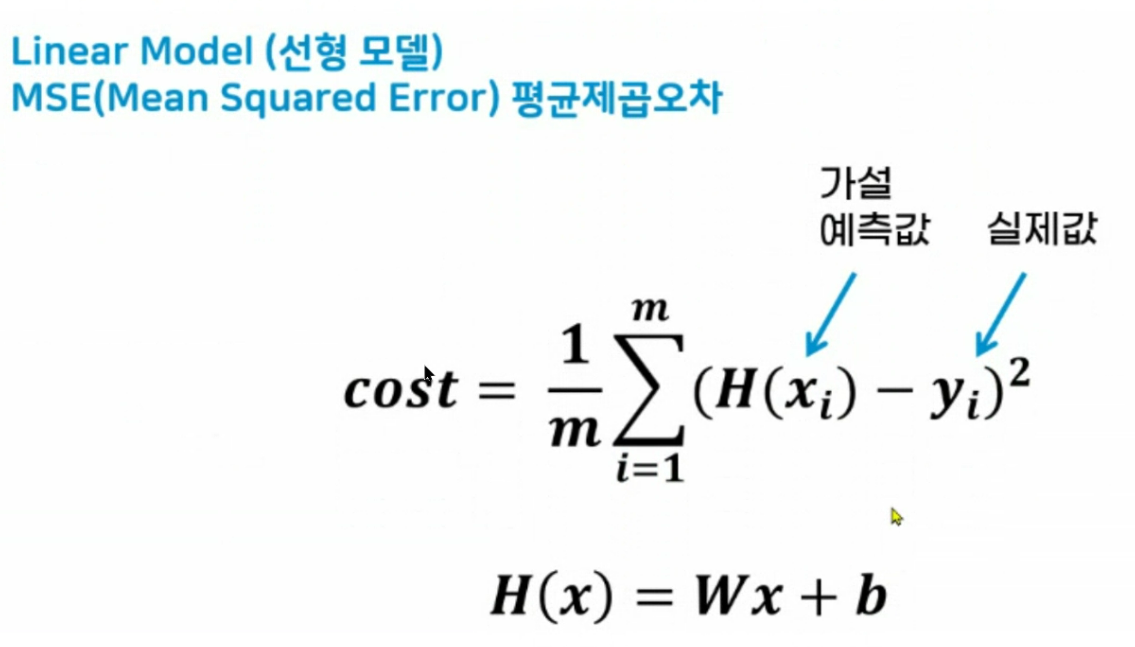

In [56]:
# 선형회귀 가설함수 만들기
def H(X, w):
    return X*w
# X :가설함수로 입력되는 데이터(문제)

In [57]:
y_pre = H(sample_data['공부시간'], 0.5)
y_pre

병관    4.5
영화    3.0
승환    2.0
원호    1.0
Name: 공부시간, dtype: float64

In [58]:
# 평균제곱오차 함수 만들기
def MSE(X,y,w):
    # 예측값
    y_pre = H(X,w)
    # 오차 구하기
    error = y_pre - y
    # 오차의 제곱
    squard_error = error ** 2
    return squard_error.mean()

In [62]:
MSE(sample_data['공부시간'],sample_data['성적'], 10)

0.0

### 평균제곱오차 그래프 그리기
- 최적의 가중치를 가지면 MSE는 최소값을 가진다.
- 최적의 가중치를 벗어나면 MSE값은 제곱의 효과로 급격히 증가한다.

In [63]:
# 최적의 가중치(10)를 중심으로 양쪽의 10만큼 가중치 생성
w_list = range(0,21)

In [64]:
cost_list = [MSE(sample_data['공부시간'],sample_data['성적'], w) for w in w_list]
cost_list

[3425.0,
 2774.25,
 2192.0,
 1678.25,
 1233.0,
 856.25,
 548.0,
 308.25,
 137.0,
 34.25,
 0.0,
 34.25,
 137.0,
 308.25,
 548.0,
 856.25,
 1233.0,
 1678.25,
 2192.0,
 2774.25,
 3425.0]

In [66]:
import matplotlib.pyplot as plt 

Text(0, 0.5, 'MSE')

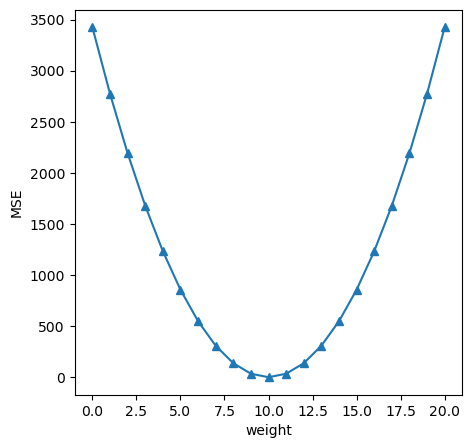

In [68]:
plt.figure(figsize=(5,5))
plt.plot(range(0,21), # X축 데이터
        cost_list,    # y축 데이터
        marker = '^')
plt.xlabel('weight')
plt.ylabel('MSE')
